In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('figure', facecolor='w')
from matplotlib import cm
from astropy.io import fits, ascii
import os

from mk_mass import posterior

In [2]:
test = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/apogee_test/test_results/safe_sample_final.csv.gz')
teff = test['TEFF']/3500
fe_h = test['FE_H']
kabs = test['K'] + 5*np.log10(test['PLX']) - 10
test['K_ABS'] = kabs
test['DIST'] = 1/test['PLX']

In [9]:
test.keys()

Index(['APOGEE_ID', 'GAIA_ID', 'RA', 'DEC', 'TEFF', 'FE_H', 'SPT', 'CHI',
       'CHI2', 'PLX', 'PLX_ERR', 'PMRA', 'PMRA_ERR', 'PMDEC', 'PMDEC_ERR',
       'VHELIO_AVG', 'L', 'B', 'X', 'Y', 'Z', 'v_x', 'v_y', 'v_z', 'J', 'H',
       'K', 'PHOT_G_MEAN_MAG', 'PHOT_BP_MEAN_MAG', 'PHOT_RP_MEAN_MAG', 'BP_RP',
       'G_ABS'],
      dtype='object')

In [3]:
R1 = 1.9515 - 0.3520*kabs + 0.01680*kabs**2
R2 = (1.9305 - 0.3466*kabs + 0.01647*kabs**2)*(1 + 0.04458*fe_h)
R3 = 10.5440 - 33.7546*teff + 35.1909*teff**2 - 11.5928*teff**3
R4 = (16.7700 - 54.3210*teff + 57.6627*teff**2 - 19.6994*teff**3)*(1 + 0.4565*fe_h)

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] n

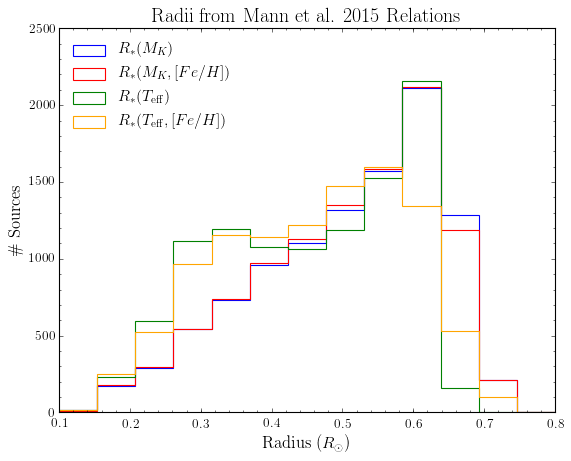

In [4]:
bins = np.linspace(.1,.8,14)
plt.hist(R1, color='b', histtype='step', bins=bins, label=r'$R_{*}(M_K)$')
plt.hist(R2, color='r', histtype='step', bins=bins, label=r'$R_{*}(M_K, [Fe/H])$')
plt.hist(R3, color='g', histtype='step', bins=bins, label=r'$R_{*}(T_{\rm eff})$')
plt.hist(R4, color='orange', histtype='step', bins=bins, label=r'$R_{*}(T_{\rm eff}, [Fe/H])$')
plt.legend(loc='upper left', frameon=False)
plt.xlabel('Radius ($R_{\odot}$)', fontsize=15)
plt.title('Radii from Mann et al. 2015 Relations', fontsize=18)
plt.ylabel(r'\# Sources', fontsize=15)
plt.minorticks_on()
plt.show()

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


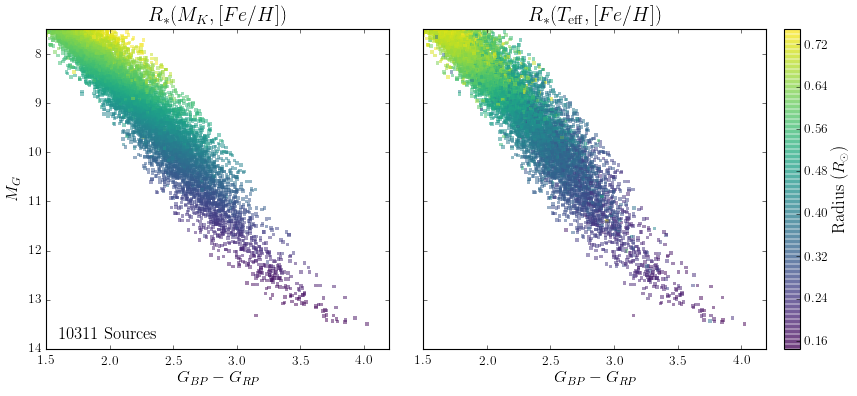

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[14,5], sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.1)
pl = ax1.scatter(test['BP_RP'], test['G_ABS'], c=R1, cmap='viridis', edgecolor='none', s=10, marker='s', \
                alpha=.5)
ax2.scatter(test['BP_RP'], test['G_ABS'], c=R3, cmap='viridis', edgecolor='none', s=10, marker='s', \
                alpha=.5)
ax1.text(1.6, 13.8, r'%s Sources'%(len(test)), fontsize=15)
ax1.set_ylabel(r'$M_G$', fontsize=15)
ax1.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax2.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax1.set_title(r'$R_{*}(M_K, [Fe/H])$', fontsize=18)
ax2.set_title(r'$R_{*}(T_{\rm eff}, [Fe/H])$', fontsize=18)
cb = fig.colorbar(pl, ax=(ax1,ax2), pad=.02).set_label('Radius ($R_{\odot}$)', fontsize=15)
plt.ylim(14,7.5)
plt.xlim(1.5,4.2)
plt.show()

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


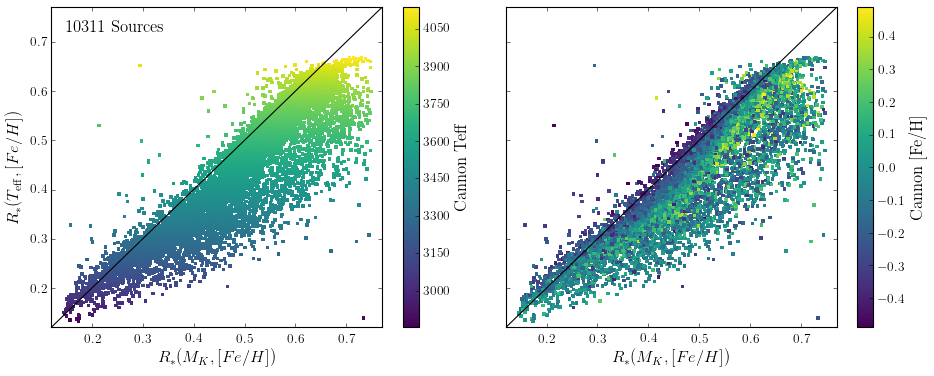

In [6]:
x = np.arange(0,1,.1)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[14,5], sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.1)

pl1 = ax1.scatter(R1, R3, edgecolor='none', c=test['TEFF'], cmap='viridis', s=10, marker='s')
ax1.plot(x, x, color='k')
fig.colorbar(pl1, ax=ax1).set_label(r'Cannon Teff', fontsize=15)

pl2 = ax2.scatter(R1, R3, edgecolor='none', c=test['FE_H'], cmap='viridis', s=10, marker='s')
ax2.plot(x, x, color='k')
fig.colorbar(pl2, ax=ax2).set_label(r'Cannon [Fe/H]', fontsize=15)

ax1.text(.15, .72, r'%s Sources'%(len(test)), fontsize=15)
ax1.set_xlabel(r'$R_{*}(M_K, [Fe/H])$', fontsize=15)
ax2.set_xlabel(r'$R_{*}(M_K, [Fe/H])$', fontsize=15)
ax1.set_ylabel(r'$R_{*}(T_{\rm eff}, [Fe/H])$', fontsize=15)
plt.xlim(.12,.77)
plt.ylim(.12,.77)
plt.show()

In [20]:
#Mann et al. 2015
M1 = 0.5858 + 0.3872*kabs - 0.1217*kabs**2 + 0.0106*kabs**3 - 2.7262E-4*kabs**4

#Mann et al. 2019


/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


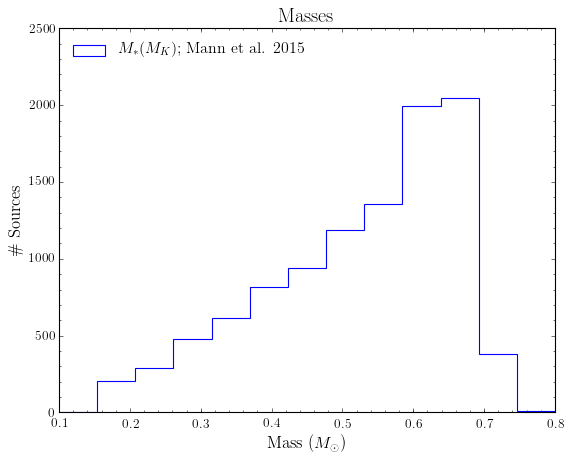

In [115]:
plt.hist(M1, color='b', histtype='step', bins=bins, label=r'$M_{*}(M_K)$; Mann et al. 2015')
plt.legend(loc='upper left', frameon=False)
plt.xlabel('Mass ($M_{\odot}$)', fontsize=15)
plt.title('Masses', fontsize=18)
plt.ylabel(r'\# Sources', fontsize=15)
plt.minorticks_on()
plt.show()

NameError: name 'M1' is not defined

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


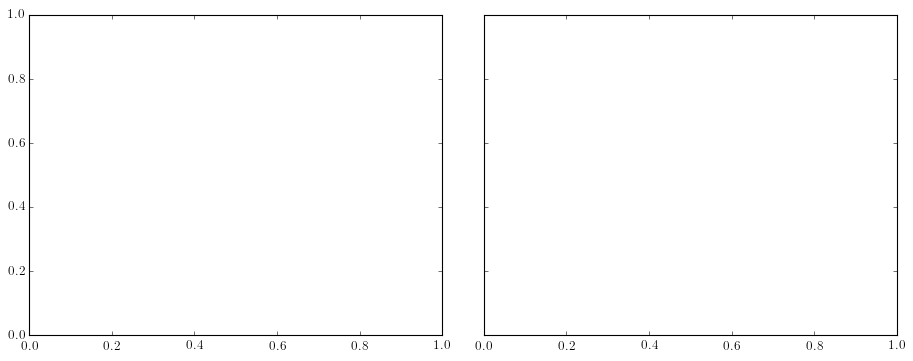

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[14,5], sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.1)
pl = ax1.scatter(test['BP_RP'], test['G_ABS'], c=M1, cmap='viridis', edgecolor='none', s=10, marker='s', \
                alpha=.5)
ax2.scatter(test['BP_RP'], test['G_ABS'], c=M2, cmap='viridis', edgecolor='none', s=10, marker='s', \
                alpha=.5)

ax1.text(1.6, 13.8, r'%s Sources'%(len(test)), fontsize=15)
ax1.set_ylabel(r'$M_G$', fontsize=15)
ax1.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax2.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
ax1.set_title(r'$M_{*}(M_K, [Fe/H])$; Mann 2015', fontsize=18)
ax2.set_title(r'$M_{*}(M_K, [Fe/H])$; Mann 2019', fontsize=18)
cb = fig.colorbar(pl, ax=(ax1,ax2), pad=.02).set_label('Mass ($M_{\odot}$)', fontsize=15)
plt.ylim(14,7.5)
plt.xlim(1.5,4.2)
plt.show()

In [13]:
k,ek  = 12,0.02
dist  = 14.55
edist = 0.13
feh, efeh = 0.3,0.1
mass      = posterior(k,dist,ek,edist)
mass_feh  = posterior(k,dist,ek,edist,feh,efeh)
print ("Mass=%6.4f+/-%6.4f" % (np.median(mass),np.std(mass)))

Mass=0.0726+/-0.0030


In [7]:
test.keys()

Index(['APOGEE_ID', 'GAIA_ID', 'RA', 'DEC', 'TEFF', 'FE_H', 'SPT', 'CHI',
       'CHI2', 'PLX', 'PLX_ERR', 'PMRA', 'PMRA_ERR', 'PMDEC', 'PMDEC_ERR',
       'VHELIO_AVG', 'L', 'B', 'X', 'Y', 'Z', 'v_x', 'v_y', 'v_z', 'J', 'H',
       'K', 'PHOT_G_MEAN_MAG', 'PHOT_BP_MEAN_MAG', 'PHOT_RP_MEAN_MAG', 'BP_RP',
       'G_ABS'],
      dtype='object')

In [11]:
1/test['PLX_ERR']

0         9.716896
1         9.887614
2        10.453326
3        17.515187
4        61.360744
5         2.477203
6        22.931766
7        17.160244
8        17.366663
9        24.669445
10       17.806281
11        9.680886
12       44.607006
13       10.503153
14       23.859334
15        3.181471
16       23.247087
17        3.199460
18       11.242732
19       12.685029
20       11.744936
21       12.187598
22       19.726871
23       11.878869
24       33.472081
25       24.364781
26        7.895581
27       28.863442
28        4.196707
29       55.854786
           ...    
10281    14.188752
10282    21.274474
10283    15.905481
10284    14.564133
10285    15.098108
10286    16.507373
10287     9.986043
10288    16.654730
10289    10.354184
10290    24.761386
10291    27.118311
10292     2.348327
10293    11.755350
10294    18.194301
10295    29.851030
10296    15.717396
10297    25.127063
10298     6.772859
10299    11.574560
10300     1.910556
10301    30.570477
10302     7.

In [19]:
masses = []
for i in range(len(test)):
    m = posterior(test['K_ABS'][i], test['DIST'][i], 0, 0)
    masses.append(np.median(m))

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no error on K, mass errors underestimated!
Warning, assuming no err

In [17]:
print ("Mass=%6.4f+/-%6.4f" % (np.median(mass),np.std(mass)))

Mass=0.0007+/-0.0076


In [18]:
test['K_ABS'][0], test['DIST'][0]

(5.853001303557939, 0.16687826268414518)

In [22]:
M2 = masses